In [1]:
import pandas as pd

In [2]:
dataset = pd.read_excel('POBLACION_MEDELLIN_1993_A_2O20.xlsx', engine='openpyxl')
dataset

,Hombres 1993,Mujeres 1993,Hombres 2005,Mujeres 2005,Hombres 2006,Mujeres 2006,Hombres 2007,Mujeres 2007,Hombres 2008,Mujeres 2008,...,Hombres 2016,Mujeres 2016,Hombres 2017,Mujeres 2017,Hombres 2018,Mujeres 2018,Hombres 2019,Mujeres_2019,Hombres 2020,Mujeres 2020
0,779,686,1415,1348,1395,1329,1366,1303,1342,1278,...,1626,1567,1670,1611,1718,1656,1768,1706,1816,1749
1,627,618,1506,1397,1504,1406,1494,1406,1486,1408,...,1581,1527,1618,1565,1660,1608,1711,1661,1767,1715
2,587,579,1470,1441,1490,1462,1505,1477,1519,1491,...,1765,1720,1792,1746,1818,1774,1853,1811,1891,1852
3,559,547,1286,1301,1324,1339,1363,1376,1405,1415,...,1684,1682,1736,1731,1793,1783,1857,1837,1909,1880
4,646,596,1119,1122,1138,1144,1155,1165,1171,1186,...,1867,1933,1910,1978,1953,2023,1997,2072,2049,2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,1339,1517,1595,2014,1668,2109,1767,2244,1882,2406,...,2559,3317,2626,3426,2693,3539,2734,3624,2797,3728
353,1053,1260,1373,1800,1354,1781,1325,1748,1302,1723,...,1865,2528,1930,2622,1991,2703,2024,2756,2070,2839
354,731,1016,981,1409,931,1347,965,1391,1006,1437,...,1143,1646,1213,1757,1286,1877,1339,1969,1392,2052
355,464,698,743,1156,718,1107,693,1068,678,1054,...,777,1208,760,1192,751,1177,741,1178,757,1221


In [3]:
from sklearn.cluster import KMeans
kmeans_instances = [KMeans(n_clusters=i).fit(dataset) for i in range(1,11)]

Elbow method

In [4]:
import numpy as np
from scipy.spatial.distance import cdist

X = dataset
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for i in range(1,11):

  distortions.append(sum(np.min(cdist(X, kmeans_instances[i-1].cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
  inertias.append(kmeans_instances[i-1].inertia_)
 
  mapping1[i-1] = sum(np.min(cdist(X, kmeans_instances[i-1].cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
  mapping2[i-1] = kmeans_instances[i-1].inertia_

In [5]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

0 : 11365.645780685632
1 : 6446.654936571437
2 : 4935.319027424419
3 : 4403.861209645116
4 : 3866.6969924347113
5 : 3627.0940192710304
6 : 3422.9842610174064
7 : 3228.256042582171
8 : 3047.5549331185243
9 : 2909.3914764723204


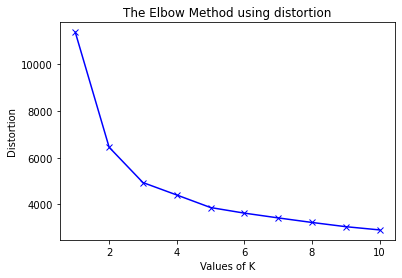

In [6]:
from matplotlib import pyplot as plt

plt.plot(range(1,11), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using distortion')
plt.savefig("kmeans_population_distortion.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_population_distortion.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_population_distortion.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [7]:
for key, val in mapping2.items():
	print(f'{key} : {val}')

0 : 57121794790.0056
1 : 18176194501.434223
2 : 10440419450.940104
3 : 8092492944.7751
4 : 6811512711.001687
5 : 5812229151.643206
6 : 5116536446.361755
7 : 4576823642.832414
8 : 4109397855.2551017
9 : 3845324699.310494


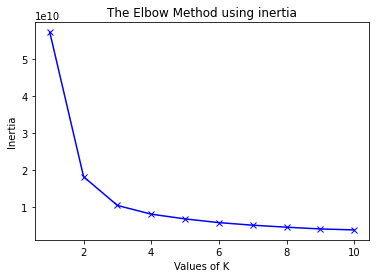

In [8]:
plt.plot(range(1,11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using inertia')
plt.savefig("kmeans_population_inertia.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_population_inertia.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_population_inertia.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()


Davies Bouldin score

In [9]:
from sklearn.metrics import davies_bouldin_score

davies_scores = []
for key, kmeans_instance in enumerate(kmeans_instances):
  if key >= 2: 
    davies_scores.append(davies_bouldin_score(X, kmeans_instance.labels_))
    print(key,':',davies_scores[-1])

2 : 0.7497684056188438
3 : 0.9434229405598615
4 : 0.906539550891663
5 : 1.0360402870003809
6 : 0.9970636464152199
7 : 1.038153391836174
8 : 0.9856263313240456
9 : 0.9776510603907237


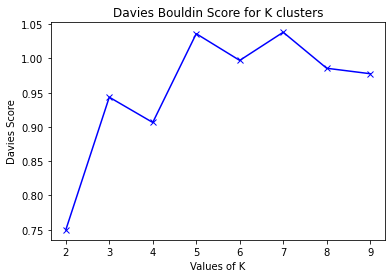

In [10]:
plt.plot(range(2,10), np.array(davies_scores), 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Davies Score')
plt.title('Davies Bouldin Score for K clusters')
plt.savefig("kmeans_population_davies_bouldin.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_population_davies_bouldin.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_population_davies_bouldin.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

Calinski Harabasz score

In [11]:
from sklearn.metrics import calinski_harabasz_score

calinski_scores = []
for key, kmeans_instance in enumerate(kmeans_instances):
    if key >= 2: 
        calinski_scores.append(calinski_harabasz_score(X, kmeans_instance.labels_))
        print(key,':',calinski_scores[-1])

2 : 791.4053141103043
3 : 712.8970709633971
4 : 649.9738032935818
5 : 619.7160183876645
6 : 592.908914428439
7 : 572.3930693750324
8 : 561.1623278852602
9 : 534.1821726404569


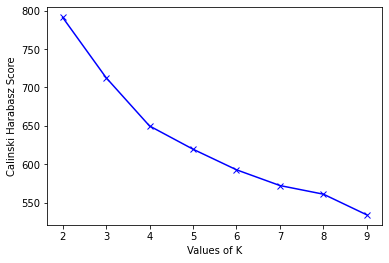

In [12]:
plt.plot(range(2,10), calinski_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Calinski Harabasz Score')
plt.savefig("kmeans_population_calinski_harabasz.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_population_calinski_harabasz.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_population_calinski_harabasz.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

Silhouette score

In [13]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for key, kmeans_instance in enumerate(kmeans_instances):
    if key >= 2: 
        silhouette_scores.append(silhouette_score(X, kmeans_instance.labels_, metric='euclidean'))
        print(key,':',silhouette_scores[-1])

2 : 0.4819574265237549
3 : 0.40839952942925434
4 : 0.3784336899561015
5 : 0.36109332085713247
6 : 0.3607303807305124
7 : 0.3698748452964798
8 : 0.36263825790378534
9 : 0.3337713003921039


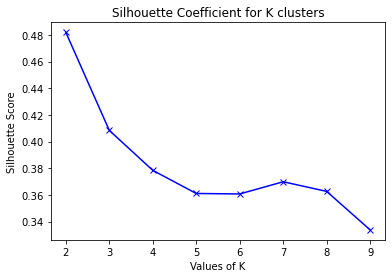

In [14]:
plt.plot(range(2,10), silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient for K clusters')
plt.savefig("kmeans_population_silhouette.png", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_population_silhouette.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("kmeans_population_silhouette.svg", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

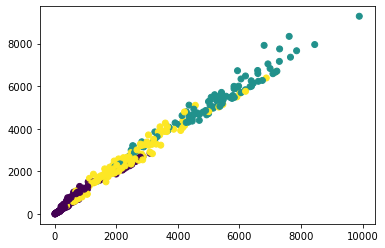

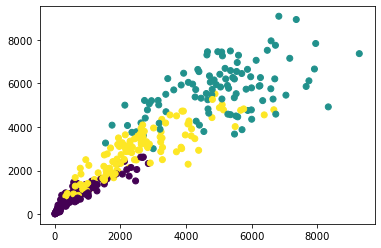

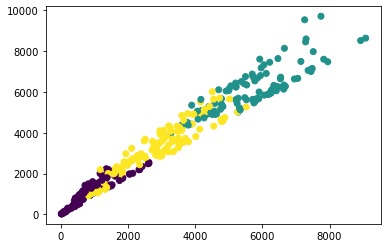

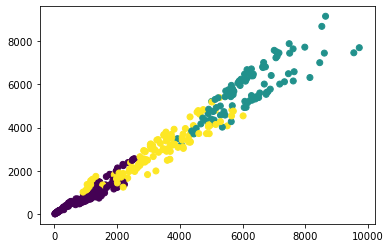

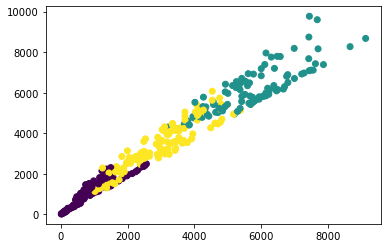

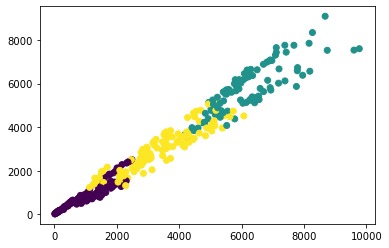

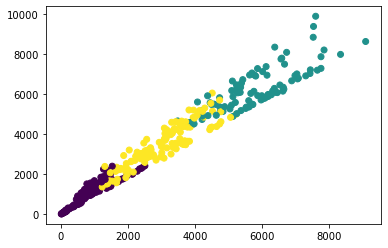

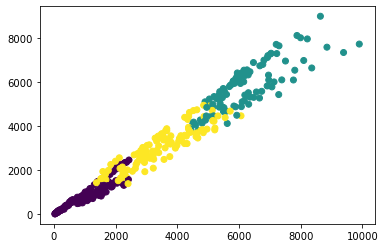

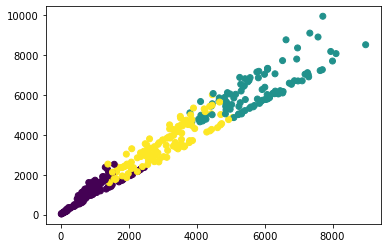

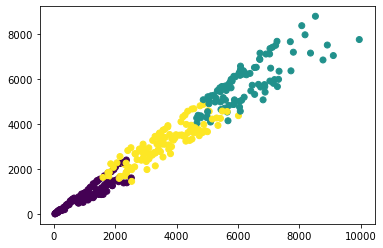

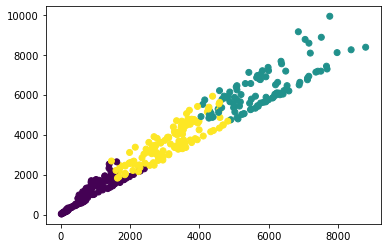

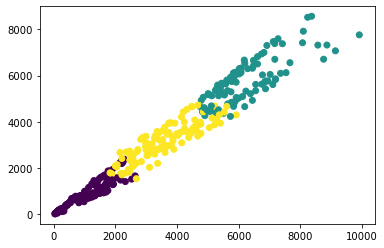

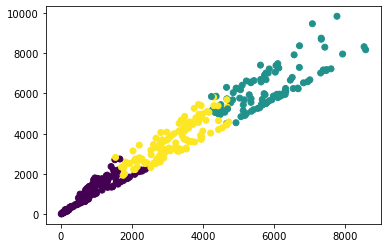

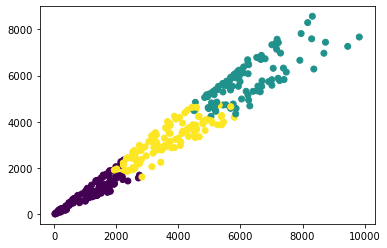

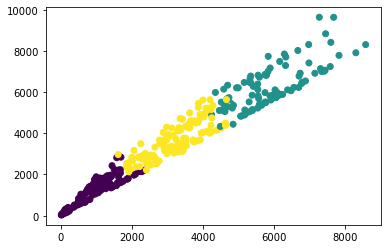

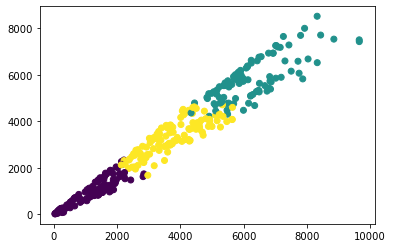

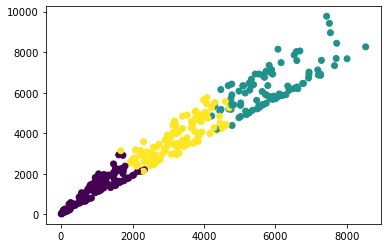

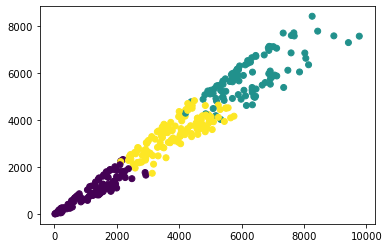

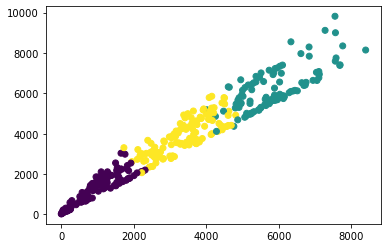

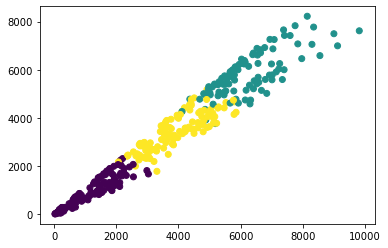

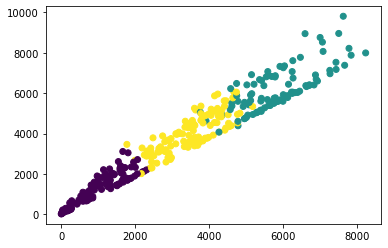

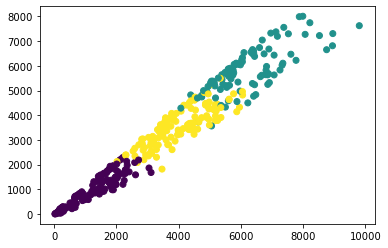

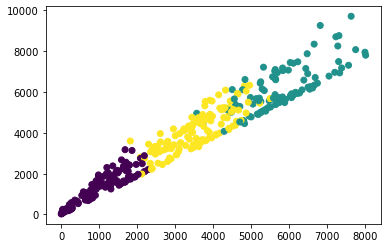

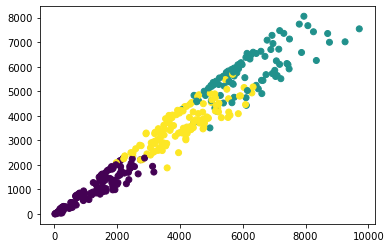

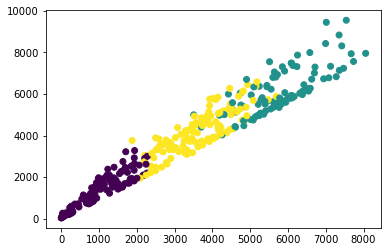

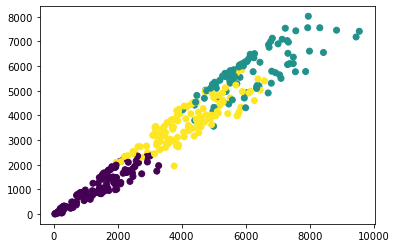

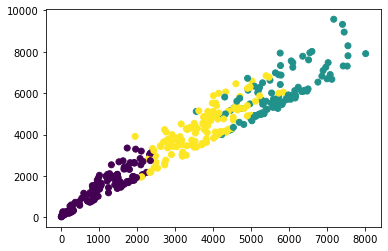

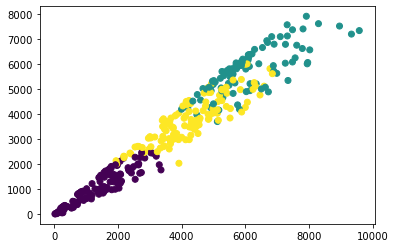

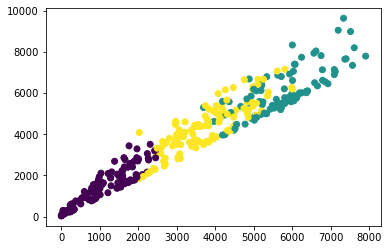

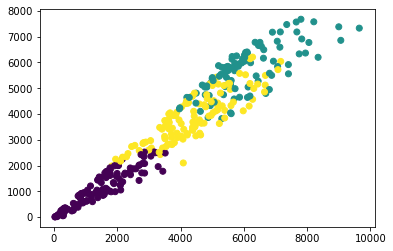

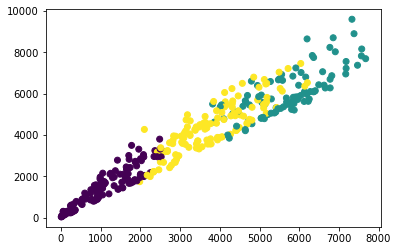

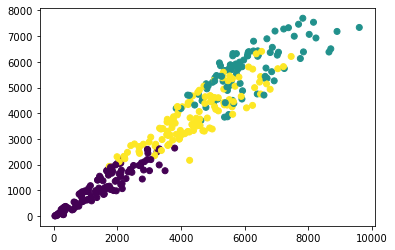

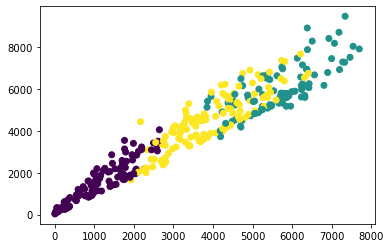

In [15]:
from matplotlib import pyplot as plt
for i in range(dataset.shape[1]-1):
    plt.scatter(dataset.iloc[:,i],dataset.iloc[:,i+1],c=kmeans_instances[2].labels_)
    plt.show()